<a href="https://colab.research.google.com/github/Auliaafnc/Artificial-Intelligence/blob/main/prediksi_pake_kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import files
uploaded = files.upload()


Saving WasteManagementAndOverallRecyclingRatesAnnual.csv to WasteManagementAndOverallRecyclingRatesAnnual.csv


In [6]:
# Import libraries
import pandas as pd

# Load dataset
file_path = 'WasteManagementAndOverallRecyclingRatesAnnual.csv'  # Pastikan nama file benar
data = pd.read_csv(file_path)

# Tampilkan 5 baris pertama dan kolom dataset
print(data.head())
print(data.columns)
print(data.info())


                DataSeries     2023     2022     2021     2020     2019  \
0          Total Generated  6859000  7385000  6944000  5880000  7234000   
1      Construction Debris   832000  1424000  1013000   825000  1440000   
2            Ferrous Metal  1296000  1338000  1312000   934000  1278000   
3        Non-Ferrous Metal   106000    92000    88000    75000   126000   
4                Used Slag   176000   169000   182000   106000   129000   

      2018     2017     2016     2015     2014     2013     2012  
0  7695000  7704300  7814200  7673500  7514500  7851500  7269503  
1  1624000  1609300  1595400  1411800  1269700  1695300  1291832  
2  1269000  1378800  1357500  1348500  1445900  1416000  1385938  
3   171000    93700    97200   180000   118400   135100   122467  
4   181000   272500   251100   369900   366300   353700   367863  
Index(['DataSeries', '2023', '2022', '2021', '2020', '2019', '2018', '2017',
       '2016', '2015', '2014', '2013', '2012'],
      dtype='object')


In [7]:
import numpy as np

# Ambil data 'Total Generated' dari dataset dari tahun 2018-2023
try:
    total_generated_data = data[data['DataSeries'] == 'Total Generated'].iloc[0, 1:7]
except IndexError:
    print("Data 'Total Generated' tidak ditemukan. Periksa penulisan kolom atau baris.")
    total_generated_data = []

# Siapkan data tahun (X) dan volume limbah (y) untuk model kNN
years = np.array([2018, 2019, 2020, 2021, 2022, 2023]).reshape(-1, 1)
waste_volume = np.array(total_generated_data).astype(float).reshape(-1, 1)

print("Tahun:", years.flatten())
print("Volume Limbah:", waste_volume.flatten())


Tahun: [2018 2019 2020 2021 2022 2023]
Volume Limbah: [6859000. 7385000. 6944000. 5880000. 7234000. 7695000.]


In [8]:
from sklearn.neighbors import KNeighborsRegressor

# Inisialisasi dan latih model kNN
knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(years, waste_volume)


KNeighborsRegressor(n_neighbors=2)

In [9]:
# Prediksi volume limbah untuk tahun 2024
predicted_volume_2024 = knn.predict(np.array([[2024]]))
print("Prediksi volume limbah untuk tahun 2024:", predicted_volume_2024[0][0])


Prediksi volume limbah untuk tahun 2024: 7464500.0


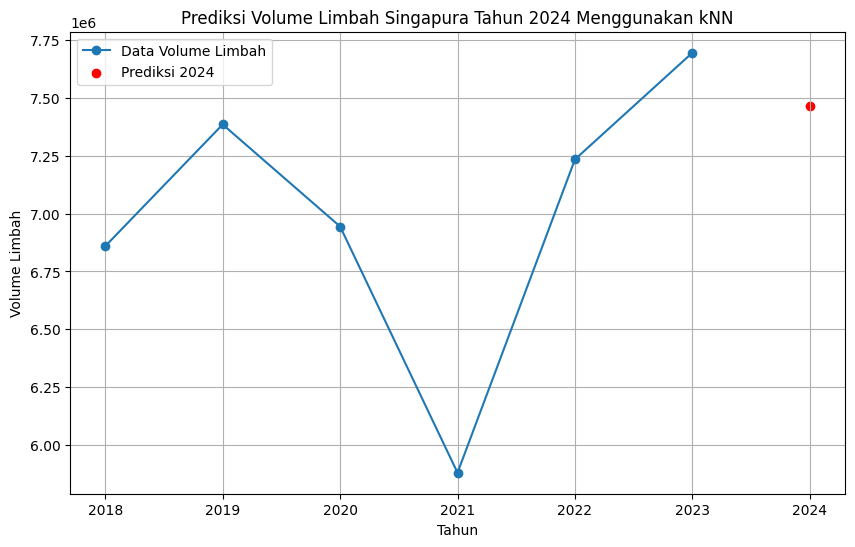

In [12]:
import matplotlib.pyplot as plt

# Plot data historis dan prediksi untuk tahun 2024
plt.figure(figsize=(10, 6))
plt.plot(years, waste_volume, marker='o', label="Data Volume Limbah")
plt.scatter(2024, predicted_volume_2024, color='red', label="Prediksi 2024")
plt.xlabel("Tahun")
plt.ylabel("Volume Limbah")
plt.title("Prediksi Volume Limbah Singapura Tahun 2024 Menggunakan kNN")
plt.legend()
plt.grid(True)
plt.show()


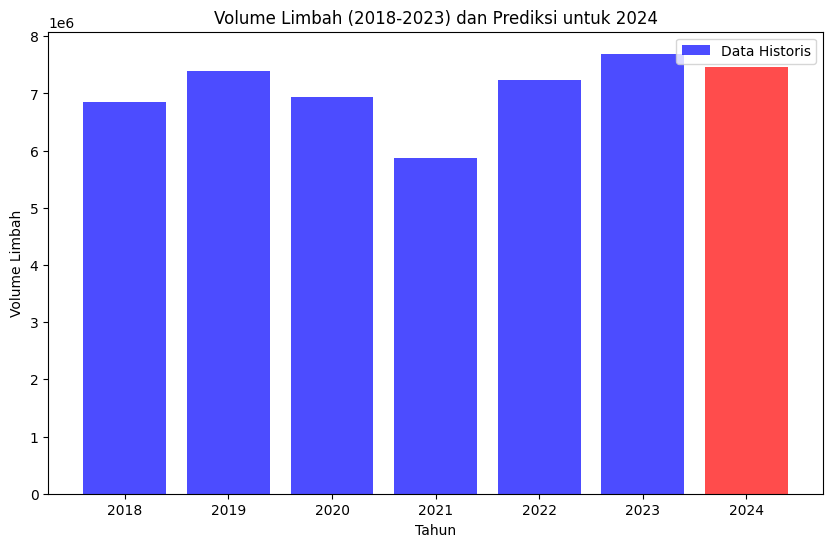

In [11]:
import matplotlib.pyplot as plt

# Gabungkan data historis dan prediksi dalam satu array
years_all = np.append(years.flatten(), 2024)
waste_volume_all = np.append(waste_volume.flatten(), predicted_volume_2024[0][0])

# Plot diagram batang
plt.figure(figsize=(10, 6))
plt.bar(years_all, waste_volume_all, color=['blue']*6 + ['red'], alpha=0.7)

# Beri label pada grafik
plt.xlabel("Tahun")
plt.ylabel("Volume Limbah")
plt.title("Volume Limbah (2018-2023) dan Prediksi untuk 2024")
plt.xticks(years_all)
plt.legend(["Data Historis", "Prediksi 2024"], loc="upper right")

# Tampilkan grafik
plt.show()
